In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import FuncFormatter
import math
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [17]:
def thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w):
    α_s = 1 - r_s * (1 - α_m)
    α_i = 1 - r_i * (1 - α_m)
    ψ_w = 1 - w * (1 - ψ)
    γ_p = 1 - p * (1 - γ)
    
    if α == 2:
        mean_a = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a = (1 - α) * (1 - eps**(2 - α)) / ((2 - α) * (1 - eps**(1 - α)))
    
    if α == 3:
        mean_a2 = ((1 - α) / (1 - eps**(1 - α))) * (-np.log(eps))
    else:
        mean_a2 = (1 - α) * (1 - eps**(3 - α)) / ((3 - α) * (1 - eps**(1 - α)))
    
    λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)
    return λ_t, mean_a

def act_thresh(eps, α, u):
    if u == 0:
        return eps
    elif u == 1:
        return 1
    
    α1 = 1 - α
    x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
    return x

def ab_vax_thresh(mu, eps, α, m, v, f, f_u, f_d):
    t_f = act_thresh(eps, α, f)
    n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
    mean_a = (1 - α)*(1 - eps**(2-α)) / ((2-α) * (1 - eps**(1-α)))
    mean_a2 = (1 - α)*(1 - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
    mean_a_f = (1 - α)*(t_f**(2-α) - eps**(2-α)) / ((2-α) * (1 - eps**(1-α)))
    mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))

    v_rev_n = (1 - v * f_u) + v * (f_u - f_d) * n_rev_f
    v_rev_a = (1 - v * f_u) * mean_a + v * (f_u - f_d) * mean_a_f
    v_rev_a2 = (1 - v * f_u) * mean_a2 + v * (f_u - f_d) * mean2_a_f

    λ_t = mu * (m * (v_rev_a + np.sqrt(v_rev_n * v_rev_a2)))**(-1)
    return λ_t, mean_a

In [18]:
α = 2.1
eps = 0.001
v = 0.99
f_u = 1
f_d = 0
t_f=0
mean_a2 = (1 - α)*(1 - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
#print(mean_a2)
mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
#print(mean2_a_f)
t_f = act_thresh(eps, α, 0.99)
#print(t_f)
n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
#print(n_rev_f)
ef = np.linspace(0.001, 0.99
                 , 100)
vi = np.linspace(0.001, 0.9, 100)
for effi in ef:
    for v in vi:
        t_f = act_thresh(eps, α, effi)
        mean2_a_f = (1 - α)*(t_f**(3-α) - eps**(3-α)) / ((3-α) * (1 - eps**(1-α)))
        n_rev_f = ((t_f**(1-α) - eps**(1-α))) / (1 - eps**(1-α))
        v_rev_n = (1 - v * f_u) + v * (f_u - f_d) * n_rev_f
        v_rev_a2 = (1 - v * f_u) * mean_a2 + v * (f_u - f_d) * mean2_a_f
        value = np.sqrt(v_rev_n * v_rev_a2)
        print(value)
        if math.isnan(value):
            print(t_f)
            print(mean_a2)
            print(mean2_a_f)
            print(n_rev_f)
            print(v_rev_n)
            print(v_rev_a2)
            print(v)
            print(effi)


0.02470676895725598
0.024482299535026356
0.024257830112272834
0.024033360688980734
0.023808891265134823
0.023584421840719284
0.023359952415717707
0.023135482990113018
0.02291101356388751
0.022686544137022736
0.02246207470949954
0.022237605281297985
0.022013135852397316
0.021788666422775924
0.021564196992411307
0.02133972756128001
0.021115258129357575
0.020890788696618517
0.020666319263036206
0.020441849828582877
0.020217380393229508
0.019992910956945796
0.019768441519700038
0.019543972081459093
0.019319502642188263
0.01909503320185124
0.018870563760409968
0.018646094317824567
0.018421624874053216
0.018197155429052026
0.01797268598277492
0.01774821653517348
0.01752374708619682
0.017299277635791407
0.017074808183900888
0.016850338730465913
0.01662586927542393
0.01640139981870896
0.016176930360251352
0.015952460899977546
0.01572799143780979
0.0155035219736658
0.01527905250745849
0.015054583039095563
0.014830113568479136
0.014605644095505306
0.014381174620063684
0.014156705142036891
0.0139

0.019588553863609665
0.01937513905795389
0.01916171349466895
0.01894827681024636
0.018734828624593174
0.01852136854007409
0.01830789614048623
0.018094410989961215
0.017880912631788183
0.017667400587151168
0.017453874353773453
0.017240333404460777
0.01702677718553444
0.016813205115144468
0.016599616581452065
0.0163860109406692
0.016172387514942172
0.015958745590064348
0.015745084413001837
0.01553140318921387
0.015317701079747784
0.015103977198086078
0.014890230606720506
0.014676460313425115
0.014462665267196879
0.014248844353828755
0.014034996391075647
0.013821120123368787
0.013607214216028458
0.013393277248918523
0.013179307709478685
0.01296530398506199
0.012751264354495147
0.012537186978767887
0.012323069890744337
0.012108910983774165
0.011894707999063184
0.011680458511642558
0.011466159914750997
0.011251809402415968
0.011037403949985902
0.010822940292325677
0.010608414899340198
0.010393823948434654
0.010179163293452888
0.00996442842955469
0.00974961445339615
0.009534716017860136
0.00

0.005837543215208252
0.005613483746770719
0.005387491605202705
0.005159312827502877
0.004928643722463342
0.004695117258275278
0.004458284449198699
0.004217588342407899
0.02470949209675527
0.024509737107809203
0.024309956689699857
0.024110150210297346
0.02391031701625838
0.023710456432125125
0.023510567759377647
0.023310650275436905
0.02311070323261542
0.022910725857012256
0.022710717347348905
0.022510676873742246
0.02231060357641067
0.022110496564308964
0.021910354913687355
0.02171017766656974
0.021509963829145756
0.021309712370070816
0.021109422218668013
0.02090909226302508
0.020708721347979235
0.020508308272981998
0.020307851789835574
0.020107350600291653
0.019906803353502676
0.01970620864331485
0.01950556500539124
0.019304870914152342
0.019104124779520306
0.018903324943451982
0.01870246967624439
0.01850155717259504
0.018300585547397667
0.018099552831252294
0.017898456965666637
0.01769729579792357
0.017496067075587048
0.017294768440616202
0.017093397423054386
0.016891951434256657
0.0

0.02092847841774396
0.02073859318732194
0.020548619443707932
0.020358554709047065
0.020168396410870842
0.019978141877477706
0.01978778833303671
0.01959733289239467
0.01940677255556521
0.01921610420187659
0.019025324583752938
0.01883443032010163
0.018643417889276856
0.018452283621586997
0.01826102369131047
0.018069634108181364
0.01787811070830292
0.017686449144442607
0.017494644875658622
0.01730269315620251
0.017110589023637407
0.016918327286105424
0.016725902508671175
0.016533308998660887
0.016340540789908525
0.016147591625811024
0.015954454941084488
0.015761123842101585
0.015567591085677507
0.015373849056157126
0.01517988974063961
0.014985704702158091
0.014791285050610895
0.014596621411217134
0.014401703890242099
0.014206522037707232
0.014011064806764081
0.013815320509371457
0.013619276767868808
0.013422920461985816
0.0132262376707671
0.013029213608820561
0.01283183255621604
0.012634077781266496
0.012435931455313371
0.012237374558509196
0.012038386775439586
0.011838946379249468
0.0116

0.010165752699086877
0.009958662287657566
0.009750063898890958
0.009539858613078248
0.009327937796469945
0.009114181782492858
0.008898458318498753
0.008680620725502144
0.008460505703927985
0.00823793069918662
0.008012690715061173
0.00778455442771624
0.007553259404598014
0.007318506164542251
0.007079950718752241
0.006837195092411843
0.006589775120265004
0.006337144498261774
0.0060786535927175615
0.005813520745717659
0.005540792567290704
0.024712342893273672
0.024538431696522502
0.024364415131225354
0.02419029092342797
0.02401605673180126
0.023841710145074066
0.02366724867934536
0.023492669775269006
0.023317970795103875
0.02314314901962161
0.022968201644863805
0.022793125778739785
0.022617918437455645
0.02244257654176445
0.0222670969130269
0.022091476269070938
0.021915711219837986
0.021739798262802652
0.02156373377815164
0.02138751402370679
0.021211135129575866
0.021034593092513494
0.02085788376997344
0.020681002873831886
0.020503945963759755
0.020326708440220557
0.020149285537068136
0.0

0.017132193652688924
0.016958995398405667
0.016785268193363127
0.01661099544136908
0.016436159789114797
0.01626074307968481
0.016084726302421002
0.0159080895387895
0.015730811903858204
0.015552871482946921
0.015374245262959526
0.015194909057848179
0.015014837427591186
0.01483400358998821
0.014652379324486728
0.014469934867150673
0.014286638795762724
0.01410245790391433
0.013917357062777122
0.013731299069063424
0.013544244477465888
0.013356151415611523
0.013166975379265792
0.012976669005169035
0.012785181818469037
0.012592459951216085
0.012398445827793262
0.012203077812443083
0.01200628981319502
0.011808010835462237
0.01160816447731639
0.011406668356910352
0.011203433460628178
0.010998363398205183
0.010791353548156473
0.010582290073217253
0.010371048780918391
0.010157493798606951
0.009941476024784337
0.009722831309040503
0.00950137830037453
0.009276915887280168
0.00904922013118189
0.008818040565543878
0.008583095693200704
0.00834406745968517
0.00810059440380684
0.007852263078136761
0.00

0.017733502189413827
0.017567886880902488
0.017401619115413533
0.01723468000965393
0.017067049863755096
0.016898708112993138
0.016729633275833527
0.016559802897954796
0.016389193491866724
0.016217780471694646
0.016045538082651297
0.015872439324661
0.015698455869536217
0.015523557971032486
0.01534771436702337
0.015170892172939727
0.014993056765506208
0.014814171655678832
0.01463419834953879
0.014453096195724593
0.014270822217783832
0.01408733092959116
0.013902574131704457
0.01371650068620854
0.013529056267215378
0.013340183083739868
0.013149819571135488
0.012957900046637022
0.012764354323793766
0.012569107279658674
0.012372078367488775
0.012173181066364619
0.011972322257490873
0.011769401514920962
0.011564310295955199
0.011356931013365634
0.011147135967729824
0.010934786113283829
0.010719729624527519
0.010501800222922738
0.010280815212855758
0.01005657316281703
0.009828851150403911
0.009597401466751294
0.009361947645159241
0.009122179636846913
0.00887774789924818
0.008628256082071599
0.

0.010135880735188365
0.009896626777988379
0.009652586555818469
0.009403387431254498
0.009148607843651376
0.008887767891968192
0.00862031745680046
0.00834562102784889
0.008062938047316571
0.0077713970365175375
0.007469960921816045
0.007157379602735967
0.024716589952832536
0.024581127528725606
0.02444534508173685
0.02430923724927696
0.02417279853498117
0.02403602330417108
0.023898905779119628
0.0237614400341085
0.023623619990267065
0.023485439410180754
0.023346891892256486
0.02320797086483147
0.02306866958001124
0.022928981107221486
0.022788898326457516
0.022648413921213806
0.022507520371075052
0.022366209943948948
0.02222447468791911
0.022082306422695715
0.02193969673063905
0.021796636947330066
0.021653118151659562
0.021509131155406026
0.02136466649226947
0.02121971440632649
0.02107426483986886
0.02092830742058517
0.02078183144804187
0.02063482587941654
0.020487279314432394
0.020339179979439063
0.020190515710579927
0.02004127393598145
0.019891441656894517
0.01974100542771168
0.019589951

0.011604974538887163
0.011377917302353765
0.011146637576755018
0.010910866850676734
0.010670307429320383
0.010424627805181668
0.010173457040468972
0.009916377890606645
0.009652918305968448
0.009382540818532736
0.009104629132397925
0.008818470961733034
0.008523235747337527
0.008217945250718072
0.007901434029355107
0.02471830112674455
0.024598319270804296
0.024477911745554005
0.02435707223819289
0.024235794287142114
0.024114071277150633
0.02399189643419294
0.02386926282014771
0.02374616332724593
0.02362259067227598
0.02349853739053281
0.023373995829497025
0.023248958142229246
0.0231234162804638
0.022997361987384914
0.02287078679006742
0.02274368199156274
0.022616038662609684
0.02248784763294798
0.02235909948221126
0.022229784530374167
0.022099892827726862
0.021969414144347842
0.021838337959044333
0.021706653447726793
0.02157434947118197
0.021441414562205958
0.021307836912055927
0.021173604356176007
0.021038704359149257
0.020903123998823804
0.02076684994955732
0.020629868464519144
0.02049

In [19]:
lam_a, minta = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 1, 1)
print(lam_a)

lam_b, mintba = ab_vax_thresh(0.01, 0.001, 2.1, 2, 1, 0.1, 0, 0)
print(lam_b)

0.1654468827603741
0.1654468827603741


In [20]:
import random

random_number = random.randint(76,76)
print(random_number)

76


In [21]:
#ab_vax_thresh(mu, eps, α, m, v, f, f_u, f_d)
lam_t, mina = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 0, 0)
lam = 3 * lam_t

ef = np.linspace(0.001, 0.99, 100)
vi = np.linspace(0.001, 0.99, 100)
iErri = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri[j, i] = lam / ab_vax_thresh(0.01, 0.001, 2.1, 2, vis, effi, 0, 1)[0]
print(iErri)
iErri_n = np.copy(iErri)
iErri_n[iErri_n<1] = np.nan

[[2.99999867 2.99998539 2.9999721  ... 2.99847166 2.99841481 2.99831431]
 [2.9999854  2.99983944 2.99969338 ... 2.98317398 2.98254935 2.98144642]
 [2.99997212 2.99969349 2.99941463 ... 2.96782158 2.96662956 2.96452703]
 ...
 [2.9987107  2.98579395 2.97280954 ... 0.84383338 0.76255537 0.65491589]
 [2.99869742 2.98564728 2.97252817 ... 0.79045622 0.70341026 0.58835353]
 [2.99868414 2.98550061 2.97224677 ... 0.7318646  0.63684967 0.51023984]]


In [22]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = ab_vax_thresh(0.01, 0.001, 2.1, 2, 0, 1, 0, 0)
lam = 1.2 * lam_t

ef = np.linspace(0.01, 0.99, 100)
vi = np.linspace(0.01, 0.99, 100)
iErri2 = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        iErri2[j, i] = lam / ab_vax_thresh(0.01, 0.001, 2.1, 2, vis, effi, 0, 1)[0]
print(iErri2)
iErri2_n = np.copy(iErri2)
iErri2_n[iErri2_n<1] = np.nan

[[1.19994683 1.19989415 1.19984144 ... 1.19387344 1.193647   1.19324806]
 [1.19989419 1.19978937 1.19968445 ... 1.1877872  1.18733676 1.18654402]
 [1.19984155 1.19968457 1.19952745 ... 1.18167918 1.18100489 1.17981946]
 ...
 [1.19482978 1.18968511 1.18451349 ... 0.3366208  0.30428217 0.26151156]
 [1.19477691 1.18957938 1.18435439 ... 0.31540339 0.28078294 0.23508146]
 [1.19472403 1.18947365 1.18419527 ... 0.29212089 0.25435173 0.20409593]]


In [23]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 3 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
rErri = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        rErri[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(rErri)

[[2.9997 2.9994 2.9991 ... 2.9706 2.9703 2.97  ]
 [2.9994 2.9988 2.9982 ... 2.9412 2.9406 2.94  ]
 [2.9991 2.9982 2.9973 ... 2.9118 2.9109 2.91  ]
 ...
 [2.9706 2.9412 2.9118 ... 0.1188 0.0894 0.06  ]
 [2.9703 2.9406 2.9109 ... 0.0894 0.0597 0.03  ]
 [2.97   2.94   2.91   ... 0.06   0.03   0.    ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_12956/942872191.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


In [26]:
#thresh(mu, eps, α, m, v, f, α_m, r_s, r_i, ψ, p, γ, w)
lam_t, mina = thresh(0.01, 0.001, 2.1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0)
lam = 1.2 * lam_t

ef = np.linspace(0.01, 1, 100)
vi = np.linspace(0.01, 1, 100)
rErri2 = np.zeros((len(ef), len(vi)))

for i, effi  in enumerate(ef):
    for j, vis in enumerate(vi):
        rErri2[j, i] = lam / thresh(0.01, 0.001, 2.1, 2, vis, effi, 1, 0, 0, 0, 0, 0, 0)[0]
print(rErri2)

[[1.19988 1.19976 1.19964 ... 1.18824 1.18812 1.188  ]
 [1.19976 1.19952 1.19928 ... 1.17648 1.17624 1.176  ]
 [1.19964 1.19928 1.19892 ... 1.16472 1.16436 1.164  ]
 ...
 [1.18824 1.17648 1.16472 ... 0.04752 0.03576 0.024  ]
 [1.18812 1.17624 1.16436 ... 0.03576 0.02388 0.012  ]
 [1.188   1.176   1.164   ... 0.024   0.012   0.     ]]


C:\Users\crino\AppData\Local\Temp/ipykernel_12956/942872191.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  λ_t = 2 * mu * ((m * (1 - v * f) * α_s * α_i) * (mean_a * (ψ_w + γ_p) + np.sqrt(mean_a**2 * (ψ_w - γ_p)**2 + 4 * ψ_w * γ_p * mean_a2)))**(-1)


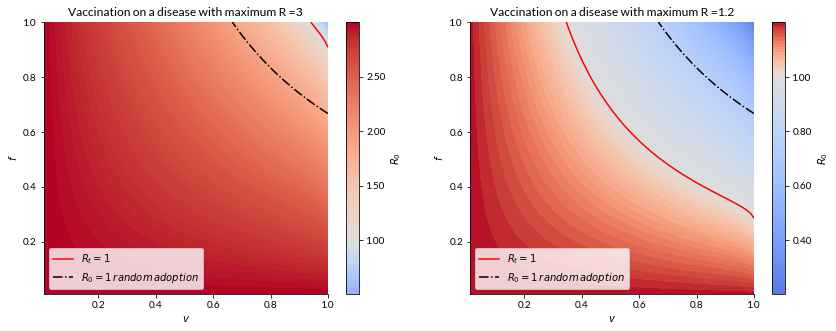

In [24]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(iErri.min(), iErri.max(), 100)

midpoint = 1  # Center of the colormap
vmin, vmax = 0, 3  # Min and max values of the colormap
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)

plot_surface = ax[0].contourf(ef, vi, iErri, cmap="coolwarm", vmin=0, vmax=3, levels = contour_levels, norm = norm)


# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
contour2 = ax[0].contour(ef, vi, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[0].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(iErri2.min(), iErri2.max(), 100)

vmin2, vmax2 = 0, 1.2  # Min and max values of the colormap
norm2 = colors.TwoSlopeNorm(vmin=vmin2, vcenter=midpoint, vmax=vmax2)

plot_surface = ax[1].contourf(ef, vi, iErri2, cmap="coolwarm", vmin=0, vmax=1.2, levels = contour_levels2, norm = norm2)


# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
contour2 = ax[1].contour(ef, vi, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.2))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.2))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[1].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lvax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

# Show the plot
plt.show()

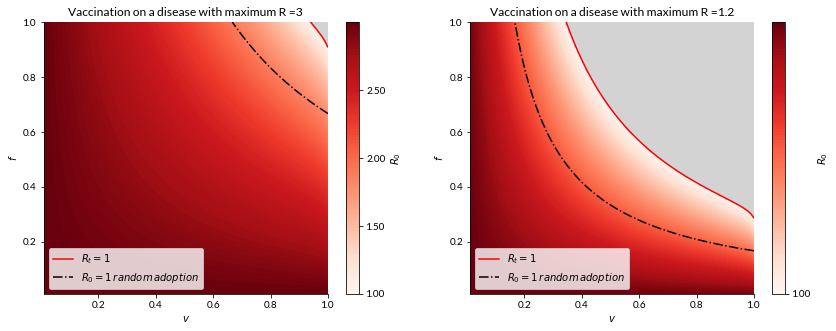

In [27]:
def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

fig, ax = plt.subplots(1,2, figsize=(14, 5))
contour_levels = np.linspace(1, np.nanmax(iErri_n), 100)
ax[0].set_facecolor("lightgrey")
vmax= np.nanmax(iErri_n)
plot_surface = ax[0].contourf(ef, vi, iErri_n, cmap="Reds", levels = contour_levels)

# Plot contour lines
contour = ax[0].contour(ef, vi, iErri, colors="red", levels=[1])
contour2 = ax[0].contour(ef, vi, rErri, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar = plt.colorbar(plot_surface,  ax=ax[0], label=r"$R_0$")

cbar.set_ticks(np.arange(0, vmax + 1, 0.5))  # Set ticks from 0 to vmax with step 1
cbar.set_ticklabels(np.arange(0, vmax + 1, 0.5))

cbar.formatter = FuncFormatter(two_significant_digits)
cbar.update_ticks()

# Add legend
ax[0].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[0].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[0].legend(loc="lower left")

# Label the axes
ax[0].set_xlabel(r"$v$")
ax[0].set_ylabel(r"$f$")
ax[0].set_title("Vaccination on a disease with maximum R =3")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[0].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[0].set_ylim(ef.min(), vi.max())  # Set y-axis limits


contour_levels2 = np.linspace(1, np.nanmax(iErri2_n), 100)
ax[1].set_facecolor("lightgrey")
vmax2= np.nanmax(iErri2_n)

plot_surface = ax[1].contourf(ef, vi, iErri2_n, cmap="Reds", levels = contour_levels2)

# Plot contour lines
contour = ax[1].contour(ef, vi, iErri2, colors="red", levels=[1])
contour2 = ax[1].contour(ef, vi, rErri2, colors="black", linestyles="-.", levels=[1])

# Add color bar
cbar2 = plt.colorbar(plot_surface,  ax=ax[1], label=r"$R_0$")

cbar2.set_ticks(np.arange(0, vmax + 1, 0.2))  # Set ticks from 0 to vmax with step 1
cbar2.set_ticklabels(np.arange(0, vmax + 1, 0.2))

cbar2.formatter = FuncFormatter(two_significant_digits)
cbar2.update_ticks()

# Add legend
ax[1].plot(0, 0, color="red", label=r"$R_t = 1\,$")
ax[1].plot(0, 0, color="black",linestyle="-.", label=r"$R_0 = 1\,random\,adoption$")
ax[1].legend(loc="lower left")

# Label the axes
ax[1].set_xlabel(r"$v$")
ax[1].set_ylabel(r"$f$")
ax[1].set_title("Vaccination on a disease with maximum R =1.2")
#ax.set_xscale("log")
#ax.set_yscale("log")
ax[1].set_xlim(ef.min(), vi.max())  # Set x-axis limits
ax[1].set_ylim(ef.min(), vi.max())  # Set y-axis limits

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lvax_phase_space.png"
# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 
for axs in ax:
    axs.spines["top"].set_visible(False)
    axs.spines["right"].set_visible(False)

# Show the plot
plt.show()

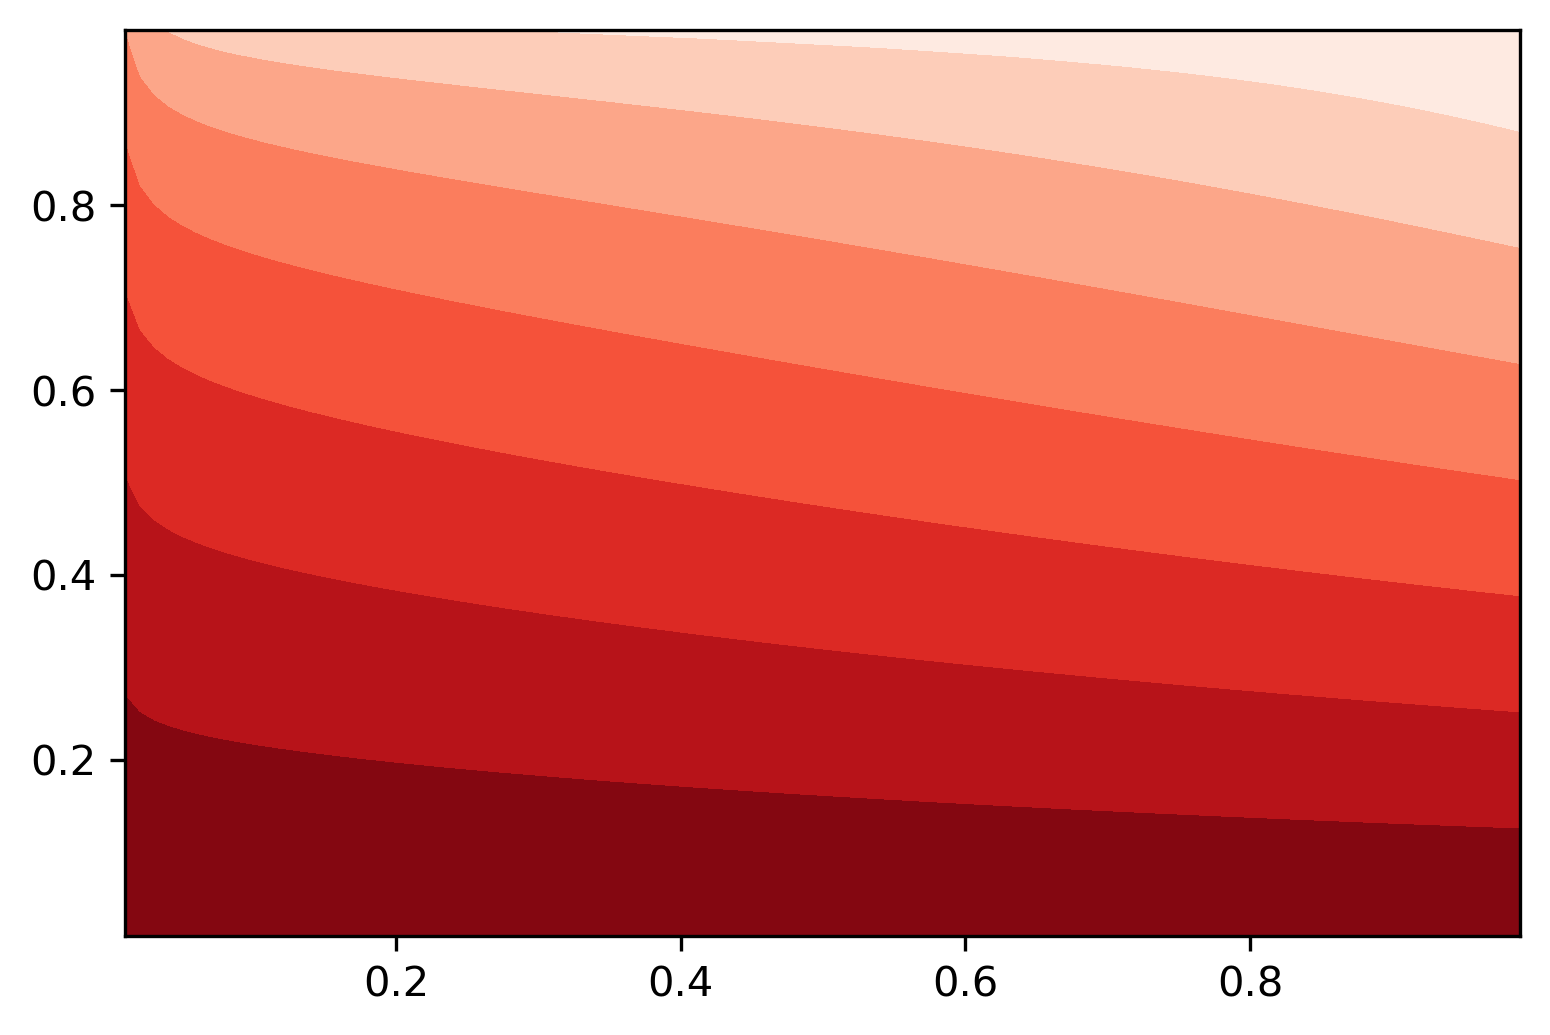

In [39]:
fig, ax = plt.subplots(dpi=300)
ax.contourf(ef, vi, iErri2, cmap="Reds", origin= "upper")
iErri2_copy = iErri2.copy()

ax.set_facecolor("lightgrey")
